## Introduction

The purpose of this project is to perform a data visualization analysis on the sentiment of tweets related to "Maggie" 
and to explore whether there is any correlation between the sentiment of tweets and the stock market of company producing 
'Maggie' i.e. 'Nestle'. Maggie is a popular instant noodle brand, and we want to explore how and why people's sentiment 
towards this brand has changed over time and if it has any impact on the stock market.

## Data Exploration

We obtained the tweet data using Twitter's API, and the stock market data was collected from Yahoo Finance. We extracted 
tweets containing the keyword related to "Maggie" from 2010 to 2023 and used natural language processing techniques to perform 
sentiment analysis on the tweets. The sentiment analysis classified the tweets into positive, negative, or neutral categories 
based on the sentiment expressed in the tweet.

Next, we explored how the sentiment of tweets changed over time. We created wordclouds and line plots to visualize the 
sentiment trends over time and identified any major spikes or dips in sentiment as well as stock market. We also analyzed 
whether certain events or trends affected the sentiment of tweets towards Maggie, such as the introduction of new flavors or 
packaging, or any negative news related to the brand.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

import itertools
from scipy.stats import pearsonr

In [2]:
# Read the dataset after all the required preprocessing is performed 
df = pd.read_csv('Nestle Preprocessed.csv') # this is the overall nestle dataset
df.head()

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day,polarity
0,30-12-2010,love nestl tvc realli awesom,0,0,366,2010,12,30,positive
1,30-12-2010,rt loreal continu work nestl time analyst pond...,0,0,17221,2010,12,30,neutral
2,29-12-2010,hot nestl nesquik 125 coupon printablecoupon c...,0,1,7771,2010,12,29,positive
3,28-12-2010,oatmeal scotchi best cooki ever nestl,0,0,1811,2010,12,28,positive
4,28-12-2010,rt us muslim new consum nich nestl increas hal...,0,1,3291,2010,12,28,positive


In [3]:
# Drop the columns 'Unnamed: 0','Month', 'Day', 'polarity'
maggi = df.drop(['Month', 'Day', 'polarity'],axis=1,inplace=True)

In [4]:
# Filter the rows containing the keyword "maggi"
maggi = df[df['Text'].str.contains('maggi', case=False)] # extract dataset of tweets that contain 'maggi' in it

In [5]:
# import the Natural Language Toolkit (nltk) library
import nltk
#nltk.download('vader_lexicon')

# import the SentimentIntensityAnalyzer class from the vader module in the nltk.sentiment package to perform sentiment analysis on text.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize VADER
sid = SentimentIntensityAnalyzer()

# define a function to get the sentiment score for each tweet
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# apply the function to the 'text' column and create a new 'sentiment_score' column for 'maggi' dataset
maggi['Sentiment Score'] = maggi['Text'].apply(get_sentiment_score)

C:\Users\HP\AppData\Local\Temp/ipykernel_23592/3845275640.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maggi['Sentiment Score'] = maggi['Text'].apply(get_sentiment_score)


In [6]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# map the sentiment scores to categories and create a new 'category' column
maggi['Polarity'] = maggi['Sentiment Score'].apply(get_sentiment_category)

maggi.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_23592/1792171016.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maggi['Polarity'] = maggi['Sentiment Score'].apply(get_sentiment_category)


,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity
457,17-10-2010,horlick launch foodl nestl maggi stand chanc,0,0,207,2010,0.0000,Neutral
1002,29-12-2010,maggi thokkumangopickl ketchup cook togeth sur...,0,0,212,2010,0.0000,Neutral
1003,29-12-2010,thot cant maggi wierder rock,0,0,212,2010,0.0000,Neutral
1004,29-12-2010,saw status yesterday mention watch twitbid pow...,0,0,1472,2010,0.8519,Positive
1005,28-12-2010,rt omdz jus clovkd unfollowd u folliwin agen k...,0,0,1008,2010,0.0000,Neutral


In [7]:
# Get the value_counts for all 3 categories of 'Polarity'
maggi['Polarity'].value_counts()

Neutral     17115
Positive    14465
Negative     5365
Name: Polarity, dtype: int64

In [8]:
# eliminate the tweets with 'Neutral' sentiment and to focus analysis on the tweets that have a stronger emotional content
maggi = maggi[maggi['Polarity']!='Neutral']

In [9]:
# convert the 'Date' column of the 'maggi' DataFrame to a datetime format using the pandas to_datetime() method
maggi['Date'] = pd.to_datetime(maggi['Date'])

In [10]:
# Extract the year from the Date column
maggi['Year'] = maggi['Date'].dt.year

### Yearly Line plot of polarity from 2010-2023

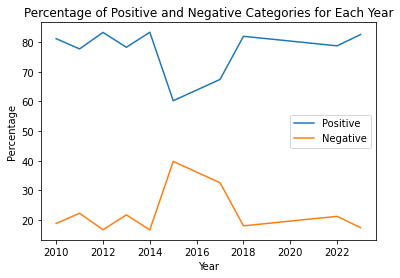

In [11]:
# group the 'maggi' DataFrame by 'Year' and counts the number of tweets in each year using the groupby() and count() methods.
total_counts = maggi.groupby('Year')['Polarity'].count()

# calculates the percentage of positive and negative tweets for each year by filtering the 'maggi' DataFrame based on the 'Polarity' column and applying the groupby() and count() methods
positive_perc = maggi[maggi['Polarity'] == 'Positive'].groupby('Year')['Polarity'].count() / total_counts * 100
negative_perc = maggi[maggi['Polarity'] == 'Negative'].groupby('Year')['Polarity'].count() / total_counts * 100

# Plot the percentages of positive and negative tweets for each year
plt.plot(positive_perc.index, positive_perc.values, label='Positive')
plt.plot(negative_perc.index, negative_perc.values, label='Negative')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Positive and Negative Categories for Each Year')
plt.legend()

# Show the plot
plt.show() # negative sentiment is high and positive is low during the exatct same year when maggie was banned i.e. 2015

In [12]:
# merge dataframes based on 'name' column
pos_neg_df = pd.merge(positive_perc, negative_perc, on='Year')

print(pos_neg_df)

      Polarity_x  Polarity_y
Year                        
2010   81.163859   18.836141
2011   77.711443   22.288557
2012   83.269598   16.730402
2013   78.265204   21.734796
2014   83.333333   16.666667
2015   60.237037   39.762963
2017   67.423751   32.576249
2018   81.963470   18.036530
2022   78.748068   21.251932
2023   82.550336   17.449664


In [13]:
# save dataframe as a csv file
#pos_neg_df.to_csv('pos_neg_%.csv')

In [14]:
total_counts

Year
2010     653
2011    1005
2012    1046
2013    1003
2014     984
2015    6750
2017    1541
2018    5256
2022    1294
2023     298
Name: Polarity, dtype: int64

### Monthly Line plot for polarity from 2010-2023

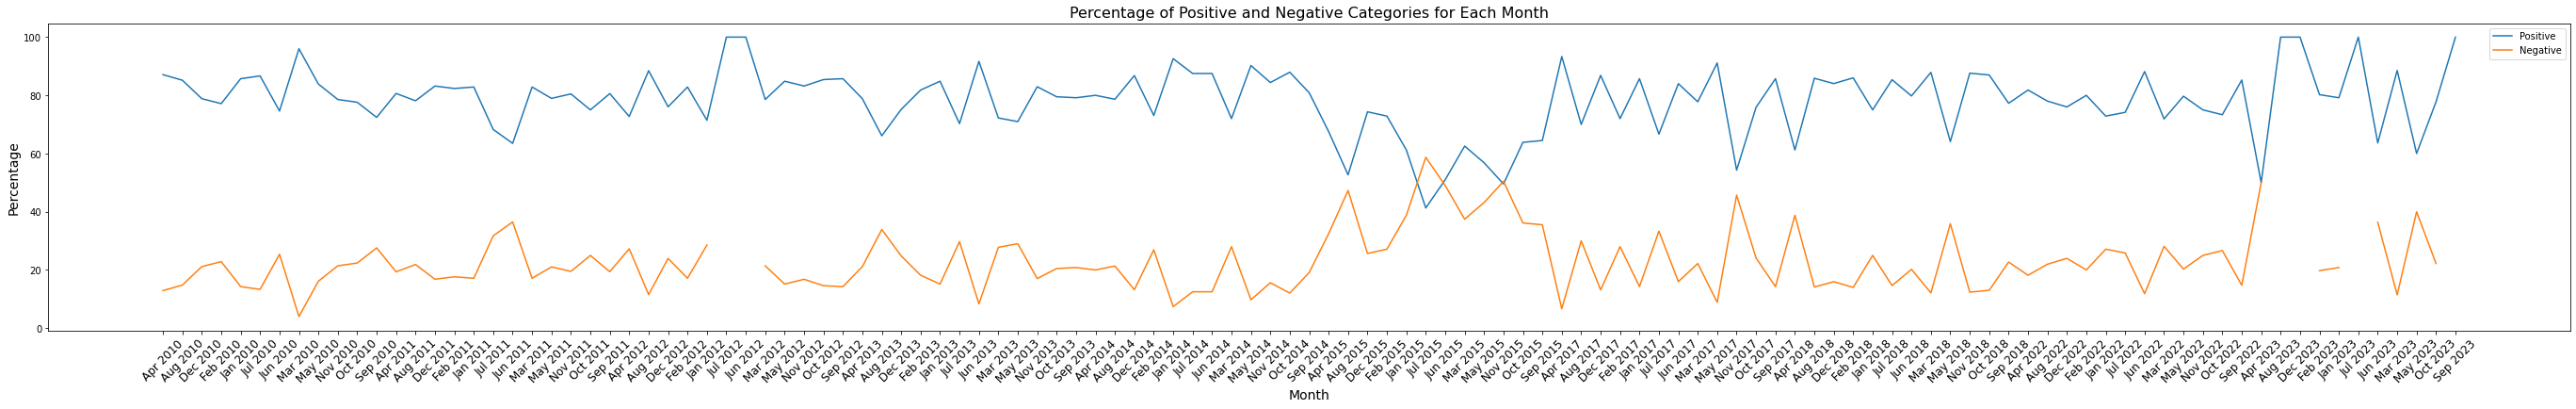

In [15]:
# Convert the Date column to a pandas datetime object
maggi['Date'] = pd.to_datetime(maggi['Date'], format='%d-%m-%Y')

# Create new columns for the year and month
maggi['Year'] = maggi['Date'].dt.year
maggi['Month'] = maggi['Date'].dt.strftime('%b %Y')

# Calculate the total count of tweets for each year and month
total_counts = maggi.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = maggi[maggi['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = maggi[maggi['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(48,6))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Percentage of Positive and Negative Categories for Each Month', fontsize=16)
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.legend()

# Show the plot
plt.show()

### Monthly Line plot for polarity from 2014-2016

C:\Users\HP\AppData\Local\Temp/ipykernel_23592/2602106570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maggi_2014_2016['Year'] = maggi_2014_2016['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_23592/2602106570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maggi_2014_2016['Month'] = maggi_2014_2016['Date'].dt.strftime('%b %Y')


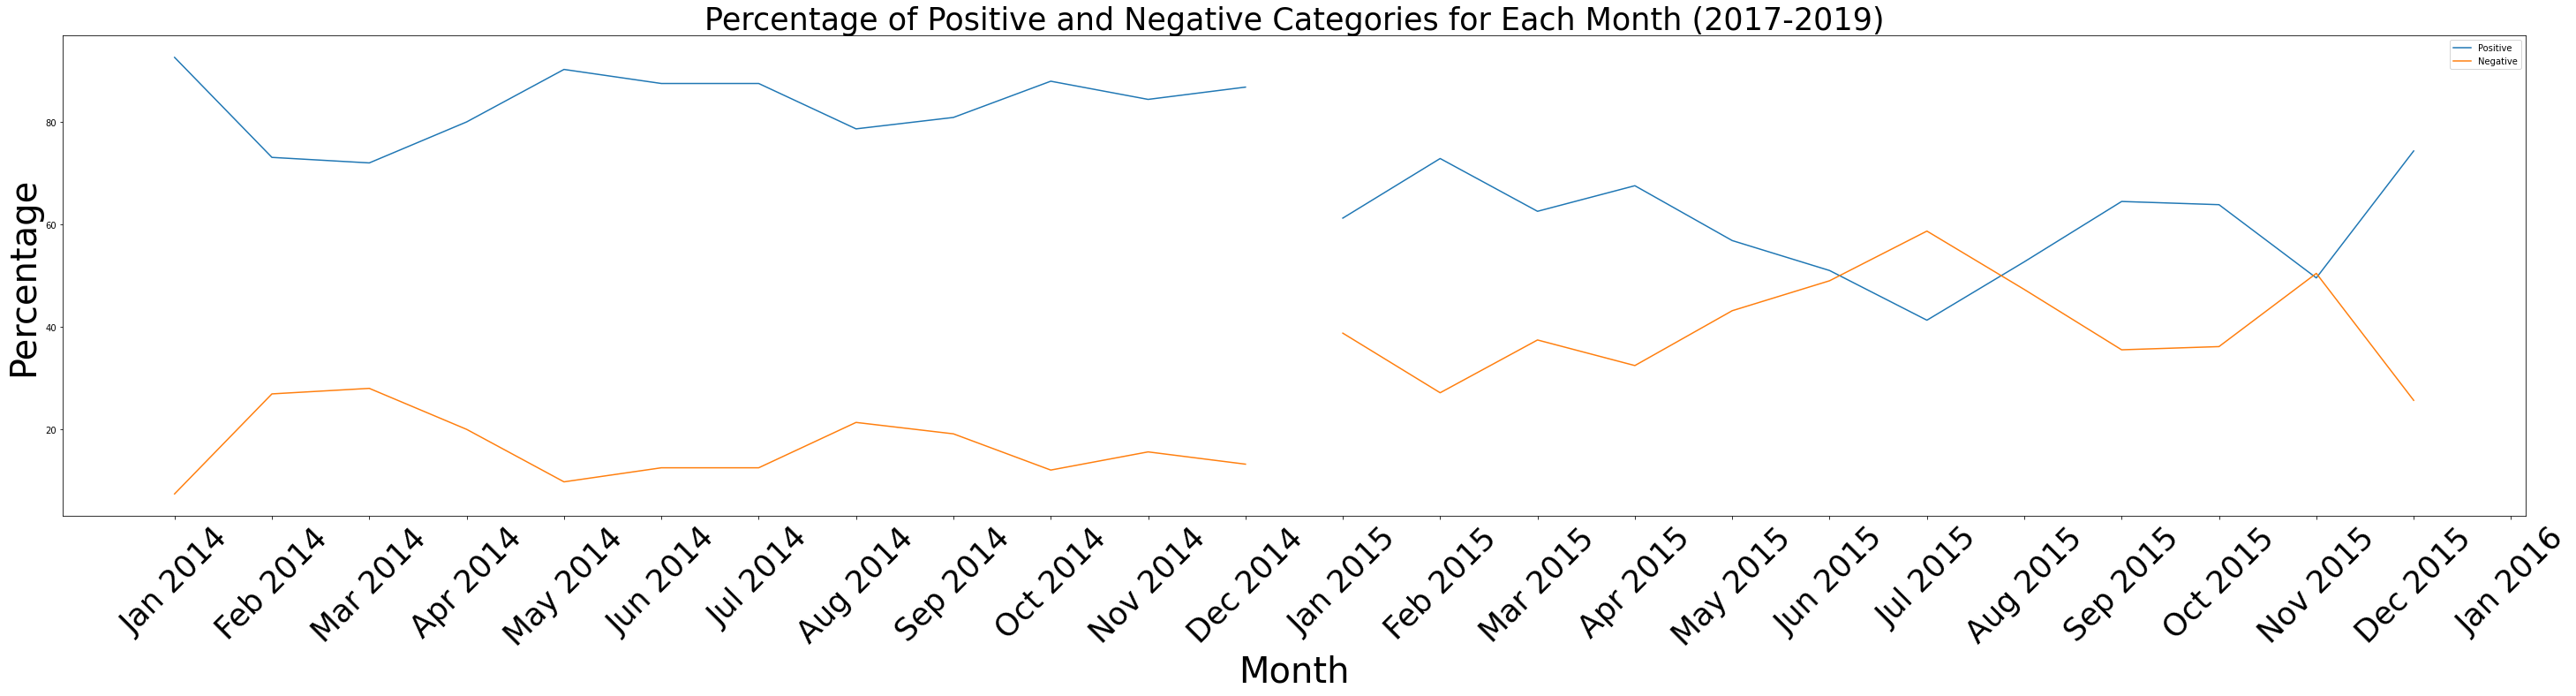

In [16]:
# Filter the data for years 2014-2016
maggi_2014_2016 = maggi[(maggi['Year'] >= 2014) & (maggi['Year'] <= 2016)]

# Create new columns for the year and month
maggi_2014_2016['Year'] = maggi_2014_2016['Date'].dt.year
maggi_2014_2016['Month'] = maggi_2014_2016['Date'].dt.strftime('%b %Y')

# Define a categorical data type for the month column with the correct order of months
month_order = ['Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'Jun 2014', 'Jul 2014', 'Aug 2014', 'Sep 2014', 'Oct 2014', 'Nov 2014', 'Dec 2014',
              'Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015', 'Aug 2015', 'Sep 2015', 'Oct 2015', 'Nov 2015', 'Dec 2015',
              'Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016']
month_cat = pd.Categorical(maggi_2014_2016['Month'], categories=month_order, ordered=True)

# Convert the Month column to the categorical data type with the correct ordering
maggi_2014_2016 = maggi_2014_2016.assign(Month=month_cat)

# Calculate the total count of tweets for each year and month
total_counts = maggi_2014_2016.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = maggi_2014_2016[maggi_2014_2016['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = maggi_2014_2016[maggi_2014_2016['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=40)
ax.set_ylabel('Percentage', fontsize=40)
ax.set_title('Percentage of Positive and Negative Categories for Each Month (2017-2019)', fontsize=35)
ax.tick_params(axis='x', labelrotation=45, labelsize=35)
ax.legend()

# Show the plot
plt.show() 
# In 2015, negative sentmiment was highest in the month of July and Maggi noodles ban in India was imposed in June 2015.
# In 2015, negative sentmiment was lowest in the month of December and ban was lifted in November 2015.

### Latent Dirichlet Allocation (LDA) for tweets from 2014-2016

In [17]:
# Filter tweets between 2014-2016
maggi_2014_2016 = maggi[(maggi['Year'] >= 2014) & (maggi['Year'] <= 2016)]

# Preprocess text data
preprocessed_data = []
for text in maggi_2014_2016['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Define the number of topics to extract
num_topics = 2

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)
# LDA to identify the topics that were most prevalent in the tweets during 2014-16, and then analyze those topics to determine what people's major concerns were during that time.

Topic: 0
	 maggi : 0.091210924
	 ban : 0.0238379
	 nestl : 0.022364717
	 maggiban : 0.01906463
	 nestleindia : 0.018972265
	 noodl : 0.01817084
	 india : 0.015005205
	 magginoodl : 0.013663196
	 test : 0.012858585
	 court : 0.009222376
Topic: 1
	 maggi : 0.057630025
	 maggiban : 0.041379996
	 nestleindia : 0.024847992
	 nestl : 0.013574512
	 amp : 0.0118142385
	 back : 0.0113546625
	 ban : 0.0092731295
	 magginoodl : 0.008954698
	 maggicontroversi : 0.0060558487
	 govt : 0.0060310634


### Monthly Line plot for polarity from 2017-2019

C:\Users\HP\AppData\Local\Temp/ipykernel_23592/2212124316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maggi_2017_2019['Year'] = maggi_2017_2019['Date'].dt.year
C:\Users\HP\AppData\Local\Temp/ipykernel_23592/2212124316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maggi_2017_2019['Month'] = maggi_2017_2019['Date'].dt.strftime('%b %Y')


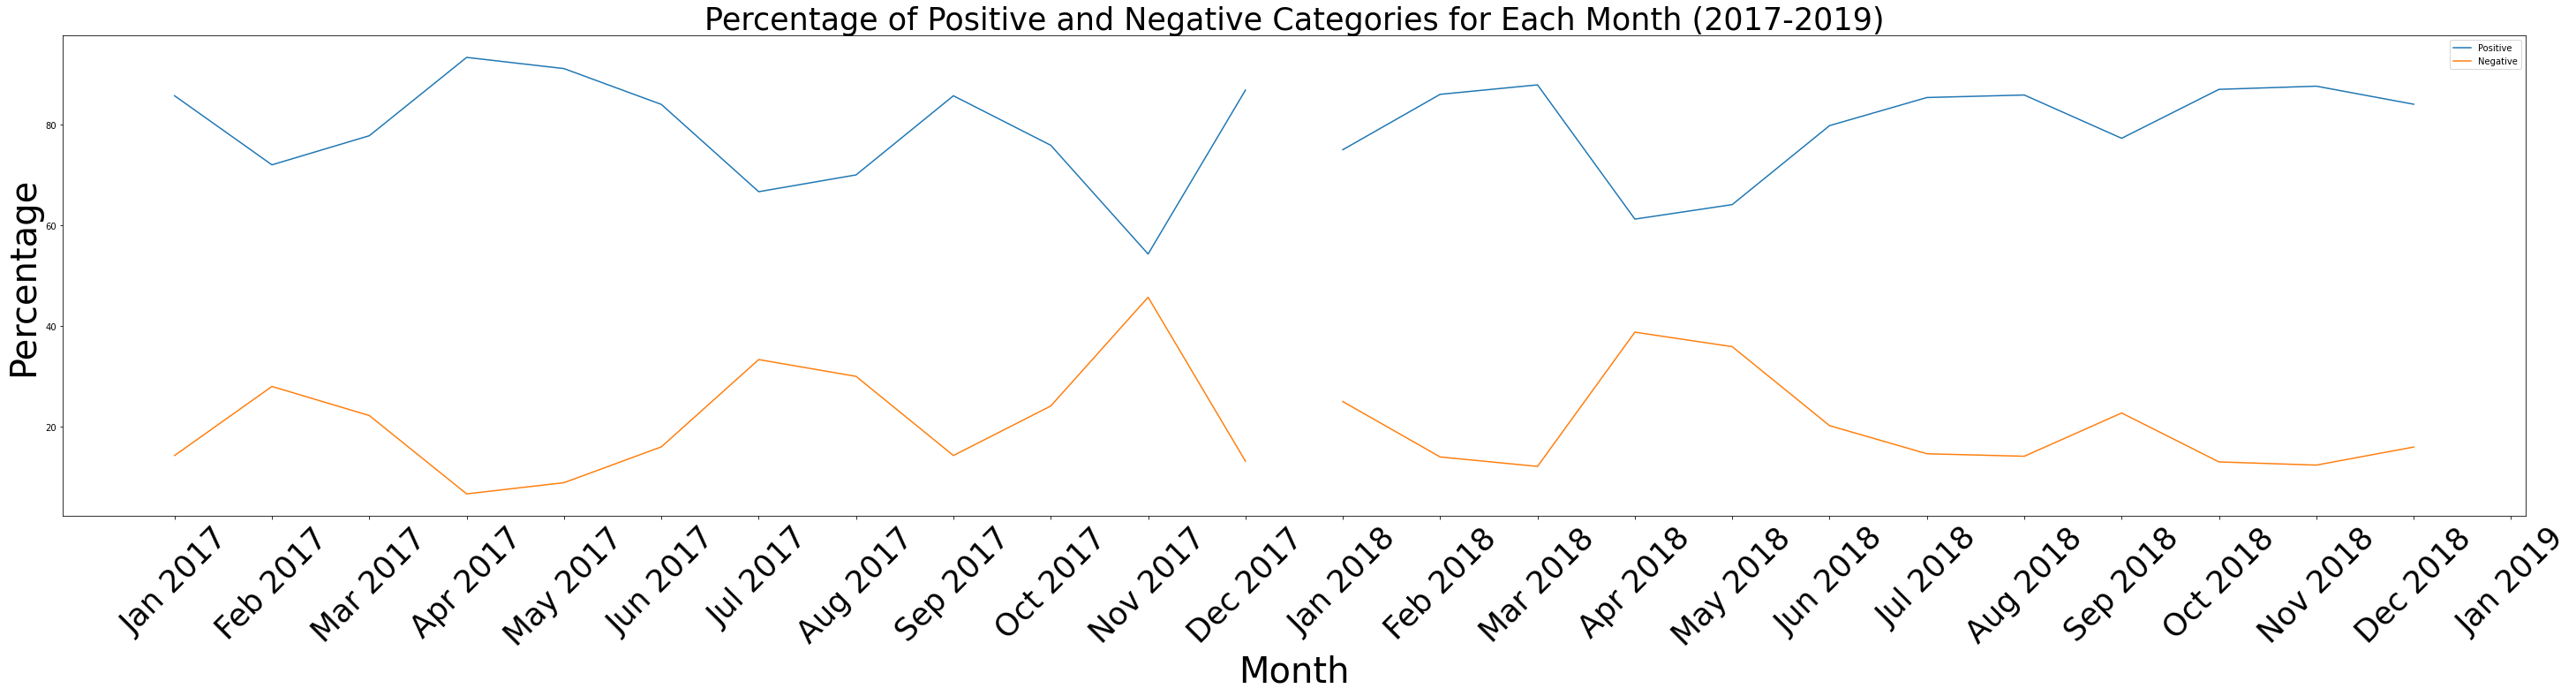

In [18]:
# Filter the data for years 2017-2019
maggi_2017_2019 = maggi[(maggi['Year'] >= 2017) & (maggi['Year'] <= 2019)]

# Create new columns for the year and month
maggi_2017_2019['Year'] = maggi_2017_2019['Date'].dt.year
maggi_2017_2019['Month'] = maggi_2017_2019['Date'].dt.strftime('%b %Y')

# Define a categorical data type for the month column with the correct order of months
month_order = ['Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017',
              'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',
              'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019']
month_cat = pd.Categorical(maggi_2017_2019['Month'], categories=month_order, ordered=True)

# Convert the Month column to the categorical data type with the correct ordering
maggi_2017_2019 = maggi_2017_2019.assign(Month=month_cat)

# Calculate the total count of tweets for each year and month
total_counts = maggi_2017_2019.groupby(['Year', 'Month'])['Polarity'].count()

# Calculate the percentage of positive and negative sentiment for each year and month
positive_perc = maggi_2017_2019[maggi_2017_2019['Polarity'] == 'Positive'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100
negative_perc = maggi_2017_2019[maggi_2017_2019['Polarity'] == 'Negative'].groupby(['Year', 'Month'])['Polarity'].count() / total_counts * 100

# Plot the percentages
fig, ax = plt.subplots(figsize=(50,10))
ax.plot(positive_perc.index.get_level_values(1), positive_perc.values, label='Positive')
ax.plot(negative_perc.index.get_level_values(1), negative_perc.values, label='Negative')

# Add labels and legend
ax.set_xlabel('Month', fontsize=40)
ax.set_ylabel('Percentage', fontsize=40)
ax.set_title('Percentage of Positive and Negative Categories for Each Month (2017-2019)', fontsize=35)
ax.tick_params(axis='x', labelrotation=45, labelsize=35)
ax.legend()

# Show the plot
plt.show()
# 

### Latent Dirichlet Allocation (LDA) for tweets from 2017-2019

In [19]:
# Filter tweets between 2017-2019
maggi_2017_2019 = maggi[(maggi['Year'] >= 2017) & (maggi['Year'] <= 2019)]

# Preprocess text data
preprocessed_data = []
for text in maggi_2017_2019['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Define the number of topics to extract
num_topics = 2

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)


Topic: 0
	 maggi : 0.08411281
	 love : 0.010720869
	 noodl : 0.009577143
	 food : 0.005529918
	 us : 0.005396391
	 amp : 0.0050895372
	 cook : 0.004712327
	 like : 0.0046050744
	 share : 0.0045124395
	 make : 0.004373382
Topic: 1
	 maggi : 0.075264856
	 nestl : 0.016442325
	 food : 0.012195614
	 noodl : 0.0070927492
	 india : 0.005318899
	 free : 0.005074032
	 packet : 0.0046489
	 get : 0.0045861537
	 like : 0.0042228494
	 foodi : 0.003829548


### WORDCLOUD for Overall Text

In [20]:
# convert the data type of the 'Text' column in the 'maggi' dataframe to a string, and assigns it to a new column called 'text'
maggi['text'] = maggi['Text'].astype(str)

# create new string variable called 'text' by joining all the strings in the 'text' column together using a space as a separator
text = ' '.join(maggi['text'])

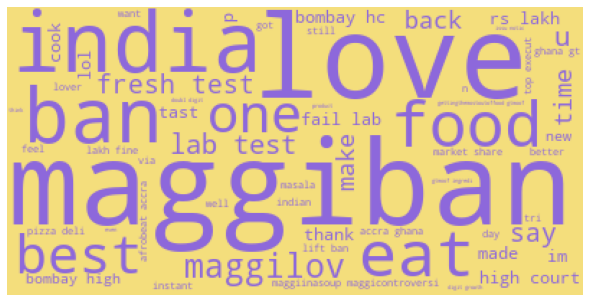

In [48]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "maggi", "nestl", "nestle" and "amp"
stopwords.add('maggi')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('amp') # amp refers to the HTML entity for an ampersand (&)
stopwords.add('noodl')
stopwords.add('magginoodl')
stopwords.add('nestleindia')

# Set the background color to dark blue
background_color = '#F4DE7C'

# Set the text color to white
text_color = '#8D68DB'

# Set the maximum number of words to 40
max_words = 60


# generate a WordCloud object with the updated stopwords
wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off') # turns off the axis display
plt.tight_layout(pad=0) # ets the layout to be tight

plt.show()

### Positive and Negative Wordcloud

In [22]:
# create positive_data by selecting rows from maggi where the 'Polarity' column is equal to the string 'Positive'
positive_data = maggi[maggi['Polarity'] == 'Positive']

# create negative_data by selecting rows from maggi where the 'Polarity' column is equal to the string 'Negative'
negative_data = maggi[maggi['Polarity'] == 'Negative']

# Combine the text data for each category into a single string
positive_text = ' '.join(positive_data['Text'])
negative_text = ' '.join(negative_data['Text'])

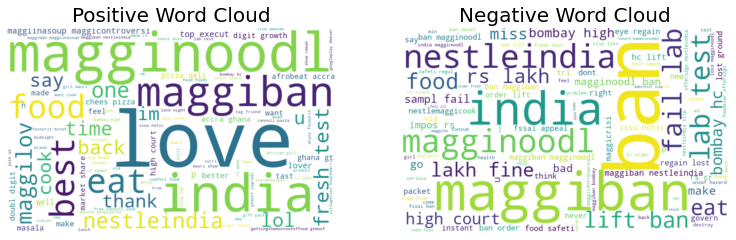

In [23]:
# import the STOPWORDS set from the WordCloud library
stopwords = set(STOPWORDS)

# add some additional stopwords related to the brands "maggi", "nestl", "nestle" and "amp"
stopwords.add('maggi')
stopwords.add('nestl')
stopwords.add('nestle')
stopwords.add('noodl')
stopwords.add('amp')

# Generate the word clouds for each category with updated stopwords
positive_wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(positive_text)
negative_wordcloud = WordCloud(stopwords=stopwords,width=800, height=500, background_color='white', max_words=100, contour_width=3, contour_color='firebrick').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud', fontsize=20)

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud', fontsize=20)

plt.show()

### DAILY DATA

In [24]:
maggi.head(3)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity,Month,text
1004,2010-12-29,saw status yesterday mention watch twitbid pow...,0,0,1472,2010,0.8519,Positive,Dec 2010,saw status yesterday mention watch twitbid pow...
1006,2010-12-28,maggi lover,0,0,581,2010,0.5859,Positive,Dec 2010,maggi lover
1007,2010-12-27,maggi lover new comic blog maggi comic repimp,0,0,111,2010,0.5859,Positive,Dec 2010,maggi lover new comic blog maggi comic repimp


In [25]:
# convert the 'Date' column to datetime format
maggi['Date'] = pd.to_datetime(maggi['Date'])

# group the tweets by day and count the number of tweets on each day
tweet_count = maggi.groupby(maggi['Date'].dt.date).size().reset_index(name='count')

print(type(tweet_count))

<class 'pandas.core.frame.DataFrame'>


In [26]:
min = tweet_count.min()
max = tweet_count.max()
mean = tweet_count.mean()

print('Minimum count :',min,'Maximum count :', max,'Mean count :',mean)

Minimum count : Date     2010-01-06
count             1
dtype: object Maximum count : Date     2023-12-03
count           538
dtype: object Mean count : count    11.657848
dtype: float64


C:\Users\HP\AppData\Local\Temp/ipykernel_23592/3620070332.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = tweet_count.mean()


In [27]:
# calculates the weighted sentiment score for each tweet based on the sentiment score and the follower count of the user who posted the tweet
maggi['Weighted_Sentiment_Score'] = maggi['Sentiment Score'] * (maggi['Follower Count'])
maggi.head(3)

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Sentiment Score,Polarity,Month,text,Weighted_Sentiment_Score
1004,2010-12-29,saw status yesterday mention watch twitbid pow...,0,0,1472,2010,0.8519,Positive,Dec 2010,saw status yesterday mention watch twitbid pow...,1253.9968
1006,2010-12-28,maggi lover,0,0,581,2010,0.5859,Positive,Dec 2010,maggi lover,340.4079
1007,2010-12-27,maggi lover new comic blog maggi comic repimp,0,0,111,2010,0.5859,Positive,Dec 2010,maggi lover new comic blog maggi comic repimp,65.0349


In [28]:
# Group the data by day 
daily_data = maggi.groupby(maggi['Date'].dt.date).agg({'Weighted_Sentiment_Score': 'sum', 'Like Count': 'sum', 'Retweet Count': 'sum', 'Follower Count': 'sum'}).reset_index()

# calculate the weighted average sentiment score for each day based on the follower counts
daily_data['Daily_Avg_Sentiment_Score'] = daily_data['Weighted_Sentiment_Score'] /(daily_data['Follower Count'])

# Print the resulting dataframe
daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score
0,2010-01-06,1000.6410,0,0,2374,0.4215
1,2010-01-07,1876.9848,0,0,4262,0.4404
2,2010-01-19,1970.3496,0,0,4474,0.4404
3,2010-01-21,-550.9768,0,0,1016,-0.5423
4,2010-01-22,3884.0296,0,0,7864,0.4939


In [29]:
# Calculate tweet volume
tweet_vol = maggi.groupby(maggi['Date'].dt.date).size().reset_index(name='Tweet Volume')
tweet_vol.head(3)

,Date,Tweet Volume
0,2010-01-06,2
1,2010-01-07,2
2,2010-01-19,2


In [30]:
# Merge tweet volume data with daily_data
daily_data = daily_data.merge(tweet_vol, on='Date', how='left')

daily_data.head()

,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-06,1000.6410,0,0,2374,0.4215,2
1,2010-01-07,1876.9848,0,0,4262,0.4404,2
2,2010-01-19,1970.3496,0,0,4474,0.4404,2
3,2010-01-21,-550.9768,0,0,1016,-0.5423,2
4,2010-01-22,3884.0296,0,0,7864,0.4939,2


In [31]:
# Drop the column 'Weighted_Sentiment_Score'
daily = daily_data.drop('Weighted_Sentiment_Score', axis=1)
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-06,0,0,2374,0.4215,2
1,2010-01-07,0,0,4262,0.4404,2
2,2010-01-19,0,0,4474,0.4404,2
3,2010-01-21,0,0,1016,-0.5423,2
4,2010-01-22,0,0,7864,0.4939,2


In [32]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# map the sentiment scores to categories and create a new 'category' column
daily['Polarity'] = daily['Daily_Avg_Sentiment_Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume,Polarity
0,2010-01-06,0,0,2374,0.4215,2,Positive
1,2010-01-07,0,0,4262,0.4404,2,Positive
2,2010-01-19,0,0,4474,0.4404,2,Positive
3,2010-01-21,0,0,1016,-0.5423,2,Negative
4,2010-01-22,0,0,7864,0.4939,2,Positive


In [33]:
# Value_count for each category of 'Polarity'
daily['Polarity'].value_counts()

Positive    1315
Negative     341
Neutral       45
Name: Polarity, dtype: int64

In [34]:
# eliminate the tweets with 'Neutral' sentiment and to focus analysis on the tweets that have a stronger emotional content
daily = daily[daily['Polarity']!='Neutral']
daily['Polarity'].value_counts()

Positive    1315
Negative     341
Name: Polarity, dtype: int64

<AxesSubplot:xlabel='Year'>

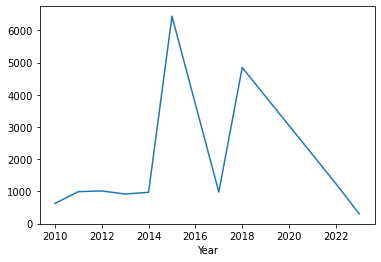

In [35]:
# Create a column for Year
daily['Year'] = pd.DatetimeIndex(daily['Date']).year

# Group the data by year, and calculates the total number of tweets per year using the 'Tweet Volume' column
yearly_tweet_volume = daily.groupby(['Year'])['Tweet Volume'].sum()

# Create a line plot of the yearly tweet volume
yearly_tweet_volume.plot() # There was a huge spike in tweet volume in 2015 when 'Maggi' was banned

In [36]:
#yearly_tweet_volume.to_csv('Tweet Volume.csv')

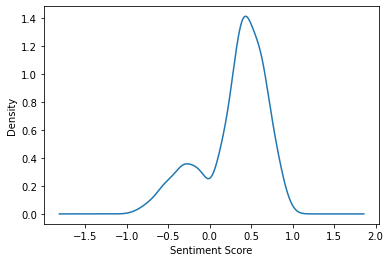

In [37]:
# Plot the distribution of sentiment scores in a density plot
daily['Daily_Avg_Sentiment_Score'].plot(kind='density')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

## NESTLE INDIA STOCKS

In [38]:
import yfinance as yf

In [39]:
# Set the start and end date for the data
start_date = '2010-01-01'
end_date = '2023-03-28'

# Retrieve historical stock data for Nestle
nestle_data = yf.download('NESTLEIND.NS', start=start_date, end=end_date)

nestle = pd.DataFrame(nestle_data)
nestle.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,527.049988,527.049988,527.049988,527.049988,445.727478,0
2010-01-05,527.049988,527.049988,527.049988,527.049988,445.727478,0
2010-01-06,527.049988,527.049988,527.049988,527.049988,445.727478,0
2010-01-07,527.049988,527.049988,527.049988,527.049988,445.727478,0
2010-01-08,2555.000000,2575.000000,2475.199951,2494.649902,2109.730469,648


In [40]:
# resulting object, nestle_yearly, will contain the mean closing prices of Nestle stock for each year in the original data
nestle_yearly = nestle['Close'].resample(rule='A').mean()

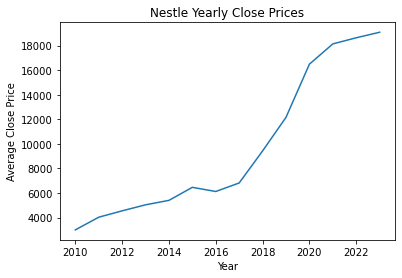

In [41]:
# create a line plot of the resampled Nestle stock closing prices
plt.plot(nestle_yearly.index.year, nestle_yearly.values)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Nestle Yearly Close Prices')
plt.show() # There was a slight decrease in Nestle stock closing prices after "Maggi" ban in 2015

In [49]:
nestle_yearly

Date
2010-12-31     2989.057204
2011-12-31     4023.117485
2012-12-31     4541.699578
2013-12-31     5032.657855
2014-12-31     5395.490967
2015-12-31     6456.334963
2016-12-31     6117.156907
2017-12-31     6812.622777
2018-12-31     9420.403854
2019-12-31    12157.572041
2020-12-31    16485.160506
2021-12-31    18135.016090
2022-12-31    18633.811075
2023-12-31    19083.951668
Freq: A-DEC, Name: Close, dtype: float64

In [42]:
#nestle_yearly.to_csv('Yearly_Adj_Close.csv')

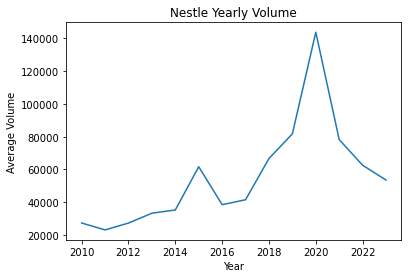

In [43]:
# resample the trading volume of Nestle stock on a yearly basis and computes the average trading volume for each year
nestle_yearlyvol = nestle['Volume'].resample(rule='A').mean()

# plot the resampled values of the average trading volume on the y-axis and the years on the x-axis
plt.plot(nestle_yearlyvol.index.year, nestle_yearlyvol.values)

plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.title('Nestle Yearly Volume')
plt.show() # There was a major drop in volume of Nestle stock after 'Maggi' ban in 2015

In [44]:
#nestle_yearlyvol.to_csv('yearly_volume.csv')

In [45]:
# define a list of variables that are of interest in the dataset
variables = ['Adj Close', 'Volume', 'Polarity', 'Tweet Volume', 'Like Count','Retweet Count', 'Follower Count', 'Sentiment Score']

# compute the Pearson correlation coefficient and p-value for all possible pairs of variables in a dataset
for var1, var2 in itertools.combinations(variables, 2): #  itertools.combinations() function to iterate over all possible pairs of variables in the variables list.
    corr_coef, p_value = pearsonr(daily[var1], daily[var2])
    # prints the results for pairs with a statistically significant correlation (i.e., p-value less than 0.05).
    if p_value < 0.05:
        print(var1 + ' and ' + var2 + ': correlation coefficient = {:.2f}, p-value = {:.2f}'.format(corr_coef, p_value))

KeyError: 'Adj Close'